# Distributions

## Overview

The `polykin.distributions` module offers a number of classes to deal with analytical and experimental (data) distributions commonly encountered in polymerization kinetics. 


| Class                     | Required arguments  | Optional arguments   |   Category   |
|---------------------------|:-------------------:|:--------------------:|:------------:|
| `Flory`                   |         DPn         |      M0, name        | analytical   |
| `Poisson`                 |         DPn         |      M0, name        | analytical   |
| `LogNormal`               |      DPn, PDI       |      M0, name        | analytical   |
| `SchulzZimm`              |      DPn, PDI       |      M0, name        | analytical   |
| `DataDistribution`        | size_data, pdf_data |  kind, M0, name, ... | data         |

All analytical distributions have the number-average degree of polymerization (`DPn`) as first required positional argument. Additionally, the `LogNormal` and `SchulzZimm` distributions take the polydispersity index (`PDI`) as second required positional argument. In the case of `DataDistribution`, the required arguments are the measured/simulated values of the distribution curve. The average molar-mass of the repeating units (`M0`) and the distribution name (`name`) are optional keyword arguments.


## Analytical distributions

In [1]:
# %pip install polykin
from polykin.distributions import Flory, LogNormal, Poisson, SchulzZimm

To instantiate an analytical distribution, we call the respective class constructor with the desired argument values. Here are some examples.

In [2]:
# Poisson distribution with DPn=100, and default M0=0.100 kg/mol and name=''
p = Poisson(100)

# Flory with DPn=120, and user-defined M0 and name                                
f = Flory(120, M0=0.065, name='polymer-F')

# Log-Normal with DPn=150, PDI=1.5, default M0 and user-defined name
g = LogNormal(150, 1.5, name='polymer-L')

# Schulz-Zimm with DPn=100, PDI=3, and user-defined M0 and name                      
s = SchulzZimm(100, 3.0, M0=0.80, name='polymer-Z') 

The most important properties of a distribution can be displayed by evaluating the object directly.

In [3]:
f

type: Flory
name: polymer-F
DPn:  120.0
DPw:  239.0
DPz:  358.5
PDI:  1.99
M0:   0.065 kg/mol
Mn:   7.800 kg/mol
Mw:   15.535 kg/mol
Mz:   23.302 kg/mol

or, equivalently, by using the `print()` function.

In [4]:
print(g)

type: LogNormal
name: polymer-L
DPn:  150.0
DPw:  225.0
DPz:  337.5
PDI:  1.50
M0:   0.100 kg/mol
Mn:   15.000 kg/mol
Mw:   22.500 kg/mol
Mz:   33.750 kg/mol


The independent properties of the distribution (i.e., the variables which are arguments of the respective class constructor) can be modified after instantiation, if desired.

In [5]:
f.DPn = 100
f.M0 = 0.084
f.name = 'polymer-Y'
print(f)

type: Flory
name: polymer-Y
DPn:  100.0
DPw:  199.0
DPz:  298.5
PDI:  1.99
M0:   0.084 kg/mol
Mn:   8.400 kg/mol
Mw:   16.716 kg/mol
Mz:   25.074 kg/mol


Any of these properties can be accessed by its name.

In [6]:
f.Mw/f.Mn # this should equal PDI

1.9899999999999995

## Probability values

[Probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) as well as [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (cfd) values can be obtained for any chain-length by using the methods `pdf()` and `cdf()`, respectively.

In [7]:
# mass pdf for a single chain-length
f.pdf(120) 

0.003628853228028265

In [8]:
# mass pdf for a list/array of chain-lengths
f.pdf([110, 120, 130]) 

array([0.00367815, 0.00362885, 0.00355536])

In [9]:
# number pdf for a list/array of chain molar masses
p.pdf([9.0, 10.0, 11.0], kind='number', sizeasmass=True) #

array([0.25042941, 0.40061472, 0.23418417])

In [10]:
# mass cdf at the first 3 characteristic DP averages
f.cdf([f.DPn, f.DPw, f.DPz], kind='mass')

array([0.26793532, 0.59535432, 0.80159978])

The pdf and cdf values are, of course, internally consistent, as illustrated by the example below.

In [11]:
import numpy as np

x = np.arange(1, p.DPn)
pdf = p.pdf(x, kind='number')
cdf = p.cdf(x[-1], kind='number')
print('sum(pdf):', np.sum(pdf))
print('cdf:     ', cdf)

sum(pdf): 0.486634197669204
cdf:      0.4866341976692096


## Random samples

Random samples of chain-lengths — for use in stochastic simulations, etc. — can be generated using the method `random()`.

In [12]:
p.random() # single value

95

In [13]:
p.random(5) # vector of length 5

array([ 98, 104,  94,  96,  87])

In [14]:
g.random((3, 4)) # array of shape (3,4)

array([[ 99., 147., 150., 620.],
       [101., 102.,  76., 157.],
       [ 40.,  43., 152., 277.]])

The random values are, of course, consistent with the distribution properties, as illustrated below for DPw.

In [15]:
x = f.random(10**5)
DPw_random = np.sum(x**2)/np.sum(x)
print("DPw random:", DPw_random)
print("DPw 'true':", f.DPw)

DPw random: 199.40217668586013
DPw 'true': 198.9999999999998


## Plots

The method `plot()` allows for a quick visualization of the corresponding _number_, _mass_ or _GPC_ probability density function (pdf) or cumulative distribution function (cdf). If no arguments are specified, the mass pdf is displayed.

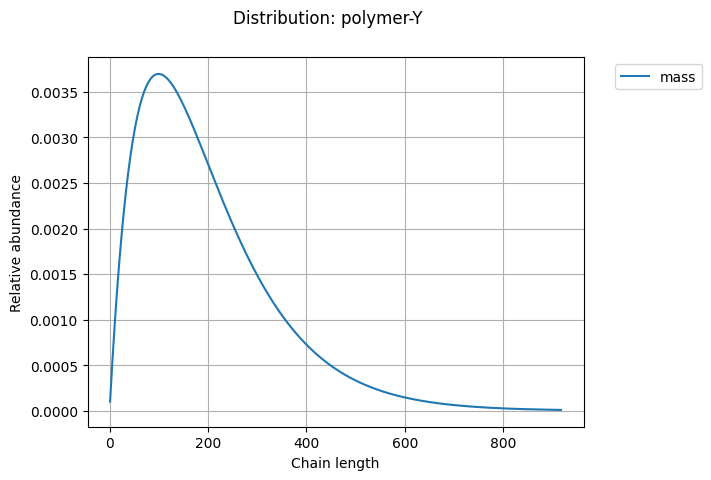

In [16]:
f.plot() # same as f.plot('mass')

Many other types of plots can be generated. For example, we can draw a plot overlaying the number and mass pdf, with an x-axis based on molar mass rather than chain-length.

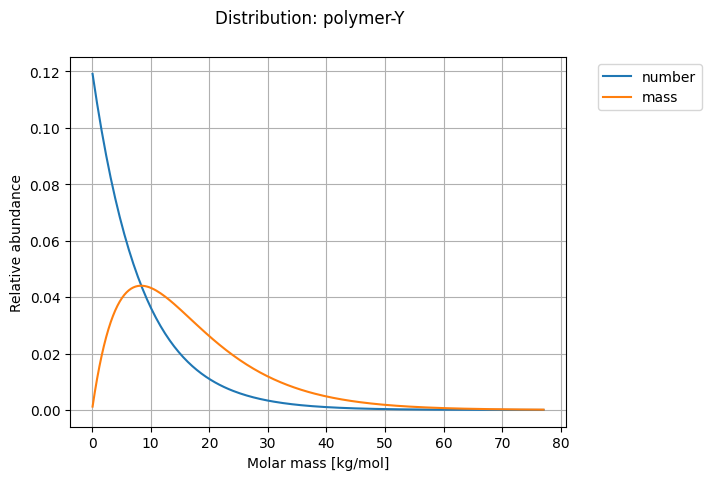

In [17]:
f.plot(['number','mass'], sizeasmass=True)

If we select a GPC-type plot, the x-axis scale is automatically switched to 'log'.  

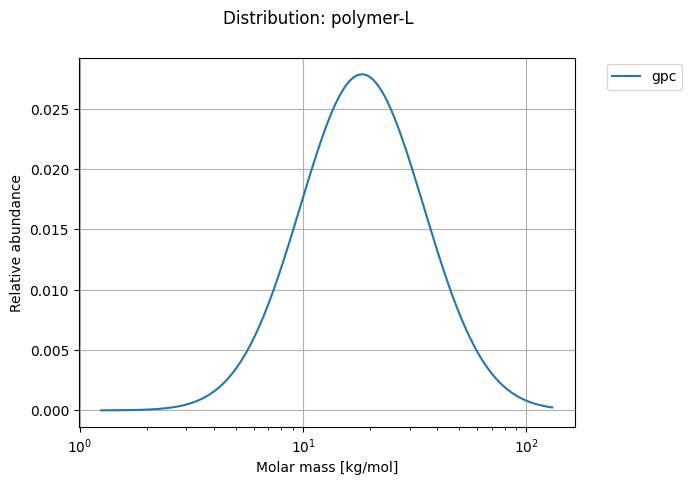

In [18]:
g.plot('gpc', sizeasmass=True)

The `plot()` method tries to automatically adjust the range of the x-axis. The built-in algorithm works rather well for `kind='number'` and `kind='mass'`, but less so for `kind='gpc'`. Whenever required, the range can be adjusted with the keyword argument `xrange=(xmin, xmax)`.  

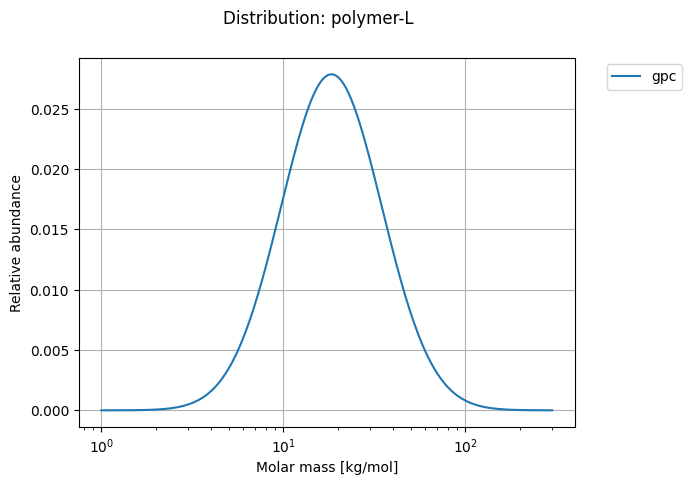

In [19]:
g.plot('gpc', sizeasmass=True, xrange=(1.0, 300.0))

The cdf can also be displayed by setting the corresponding keyword `cdf` to the desired y-axis. If `cdf=1`, the cdf is displayed on the primary axis (replacing the pdf). If `cdf=2`, the cdf is displayed on the secondary axis, while the pdf remains on the primary axis.

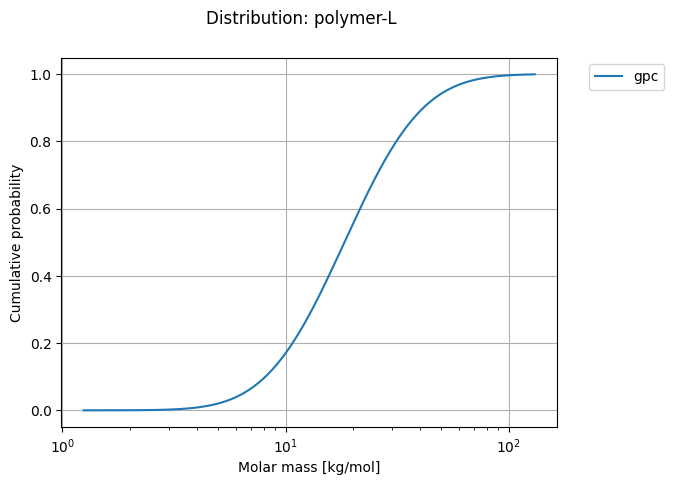

In [20]:
g.plot('gpc', sizeasmass=True, cdf=1) # cdf on primary y-axis (replaces pdf)

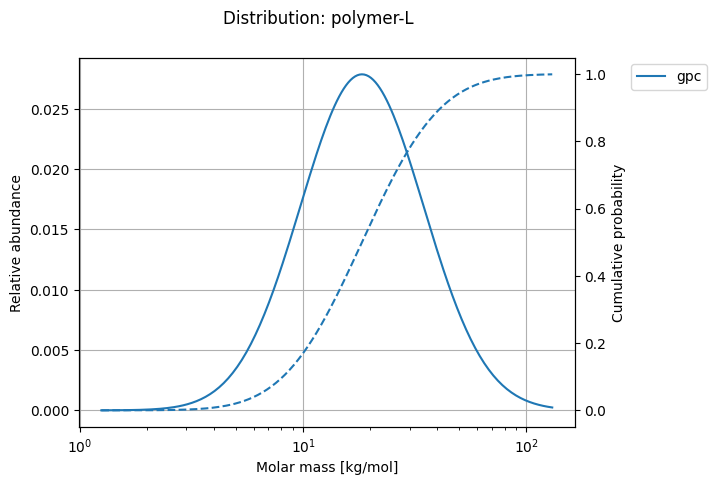

In [21]:
g.plot('gpc', sizeasmass=True, cdf=2) # cdf on secondary y-axis

If we want to save the plot or further manipulate it, we can set `return_objects=True`, which will give us handles to the figure and axes objects.

In [22]:
# fig, ax = g.plot('gpc', sizeasmass=True, cdf=2, return_objects=True)
# fig.savefig(g.name, bbox_inches='tight') # save the plot to `polymer-L.png`

Lastly, the function `plotdists()` can be used to overlay multiple distributions on the same plot. The optional keywords arguments are those of the `plot()` method. 

In [23]:
from polykin.distributions import plotdists

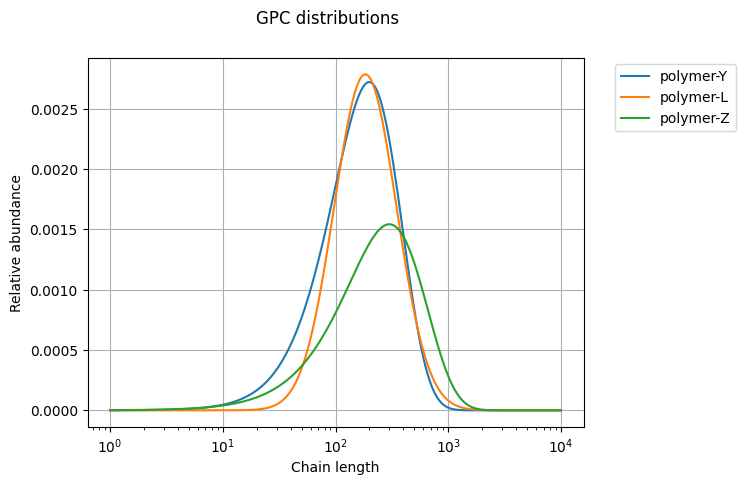

In [24]:
_ = plotdists([f, g, s], kind='gpc', xrange=(1, 1e4))

## Mixture distributions

Any of the abovementioned _individual_ distributions can be combined in any proportion to obtain a resulting [mixture distribution](https://en.wikipedia.org/wiki/Mixture_distribution). This feature can be used, for instance, to compute the distribution of a polymer blend, as illustrated below.

First, let's define some sample polymer distributions.

In [25]:
a = Poisson(10, name="A")
b = Flory(50, name="B")
c = LogNormal(1000, 2.0, name="C")
d = SchulzZimm(10**4, 2.0, name="D")

Now, we define the blend using common algebra language. The (positive) numerical factors are the _mass_ parts used to prepare the blend.

In [26]:
blend = 0.5*a + 1*b + 0.5*c + 0.2*d

As illustrated above, we can the object directly or use the `print()` command to display the key values of the distribution and of its components.

In [27]:
blend

type: MixtureDistribution
name: A+B+C+D
DPn:  31.2
DPw:  2320.2
DPz:  24295.4
PDI:  74.37
M0:   0.100 kg/mol
Mn:   3.120 kg/mol
Mw:   232.020 kg/mol
Mz:   2,429.542 kg/mol

 #   Weight   Distribution        DPn        DPw    PDI
-------------------------------------------------------
 1    0.500        Poisson   1.00e+01   1.09e+01   1.09
 2    1.000          Flory   5.00e+01   9.90e+01   1.98
 3    0.500      LogNormal   1.00e+03   2.00e+03   2.00
 4    0.200     SchulzZimm   1.00e+04   2.00e+04   2.00

In [28]:
print(blend.components_table)

 #   Weight   Distribution        DPn        DPw    PDI
-------------------------------------------------------
 1    0.500        Poisson   1.00e+01   1.09e+01   1.09
 2    1.000          Flory   5.00e+01   9.90e+01   1.98
 3    0.500      LogNormal   1.00e+03   2.00e+03   2.00
 4    0.200     SchulzZimm   1.00e+04   2.00e+04   2.00


And the built-in `plot()` method is also available for mixtures. 

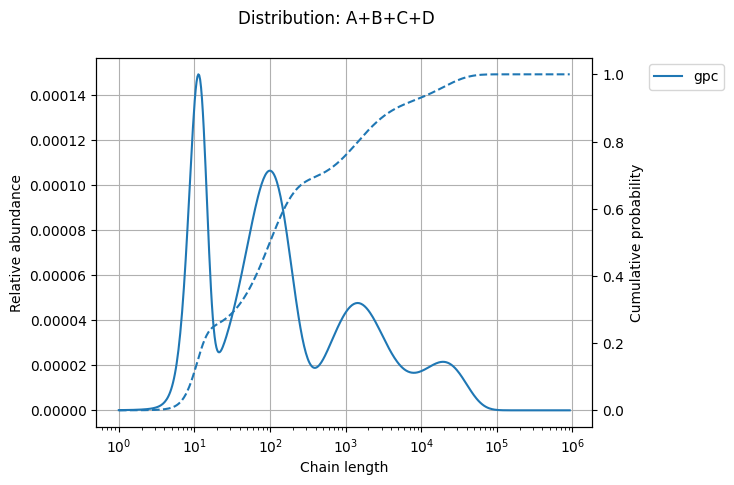

In [29]:
blend.plot('gpc', cdf=2)

## Data distributions

In [30]:
from polykin.distributions import DataDistribution

Data distributions are constructed from numerical values of the distribution curve. A typical example, would be a molar mass distribution curve determined by [size-exclusion chromatography (SEC)](https://en.wikipedia.org/wiki/Size-exclusion_chromatography).
Since we do not have experimental data at hand, we'll use sample data provided with the package.

In [31]:
from polykin.distributions import sample_mmd

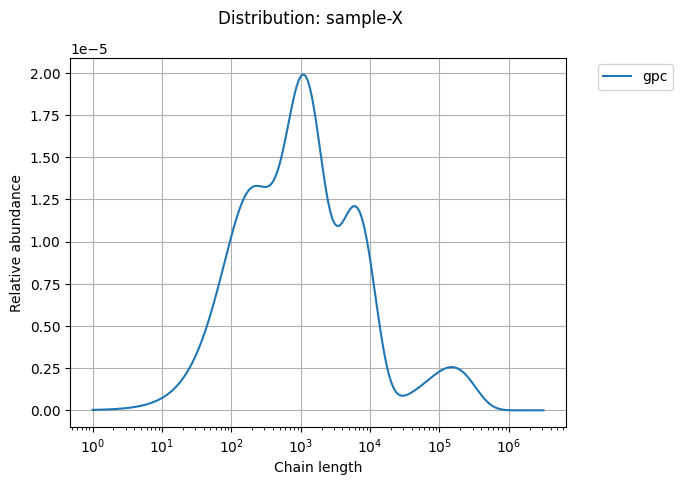

In [32]:
sampleX = DataDistribution(sample_mmd['size_data'], sample_mmd['pdf_data'],
                           kind=sample_mmd['kind'], name='sample-X')
sampleX.plot('gpc')

Most of the methods illustrated above for analytical and mixture distributions are also available for `DataDistribution`(s). 

A data distribution can be numerically "deconvoluted" to find the combination of weights and individual distributions which best describe it using the method `fit()`. For example, let's try deconvoluting the above distribution as a combination of 4 distributions of type `LogNormal`.

In [33]:
sampleX_fit = sampleX.fit(LogNormal, 4)

 #   Weight   Distribution        DPn        DPw    PDI
-------------------------------------------------------
 1    0.490      LogNormal   1.05e+02   5.17e+02   4.92
 2    0.251      LogNormal   1.06e+03   1.50e+03   1.41
 3    0.199      LogNormal   5.50e+03   7.69e+03   1.40
 4    0.060      LogNormal   9.75e+04   1.72e+05   1.76


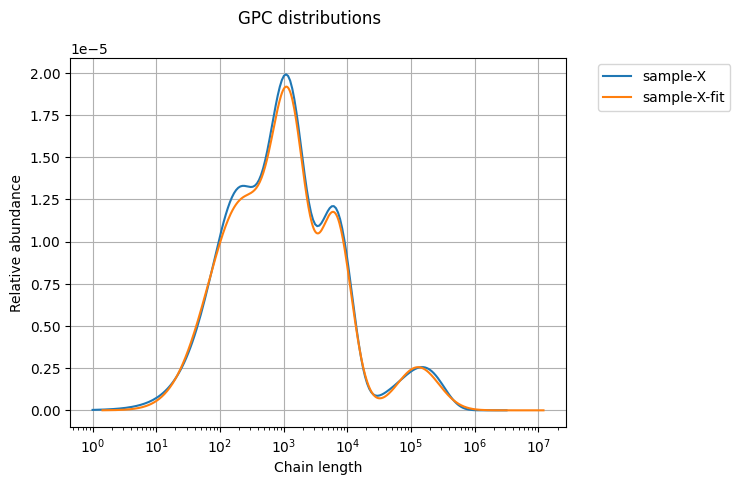

In [34]:
_ = plotdists([sampleX, sampleX_fit], 'gpc')

The fit is quite good, but it can be made even better. Go ahead, give it a try!